# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn streamlit xgboost imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 132.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
import joblib
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# Load dataset
data = pd.read_csv('data.csv', sep=';')
data.dropna(inplace=True)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Mengetahui struktur dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
# Memeriksa contoh data
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
# Menganalisis distribusi kolom
data.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
# Menganalisis distribusi kolom
data['Status'].value_counts(normalize=True)

,proportion
Status,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


In [8]:
# Cek dupilacate date
duplikat = data.duplicated()
jumlah_duplikat = duplikat.sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


In [9]:
# Analisis apa terdapat Missing Values
print("\nAnalisis Missing Values:")
print(data.isnull().sum())


Analisis Missing Values:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment       

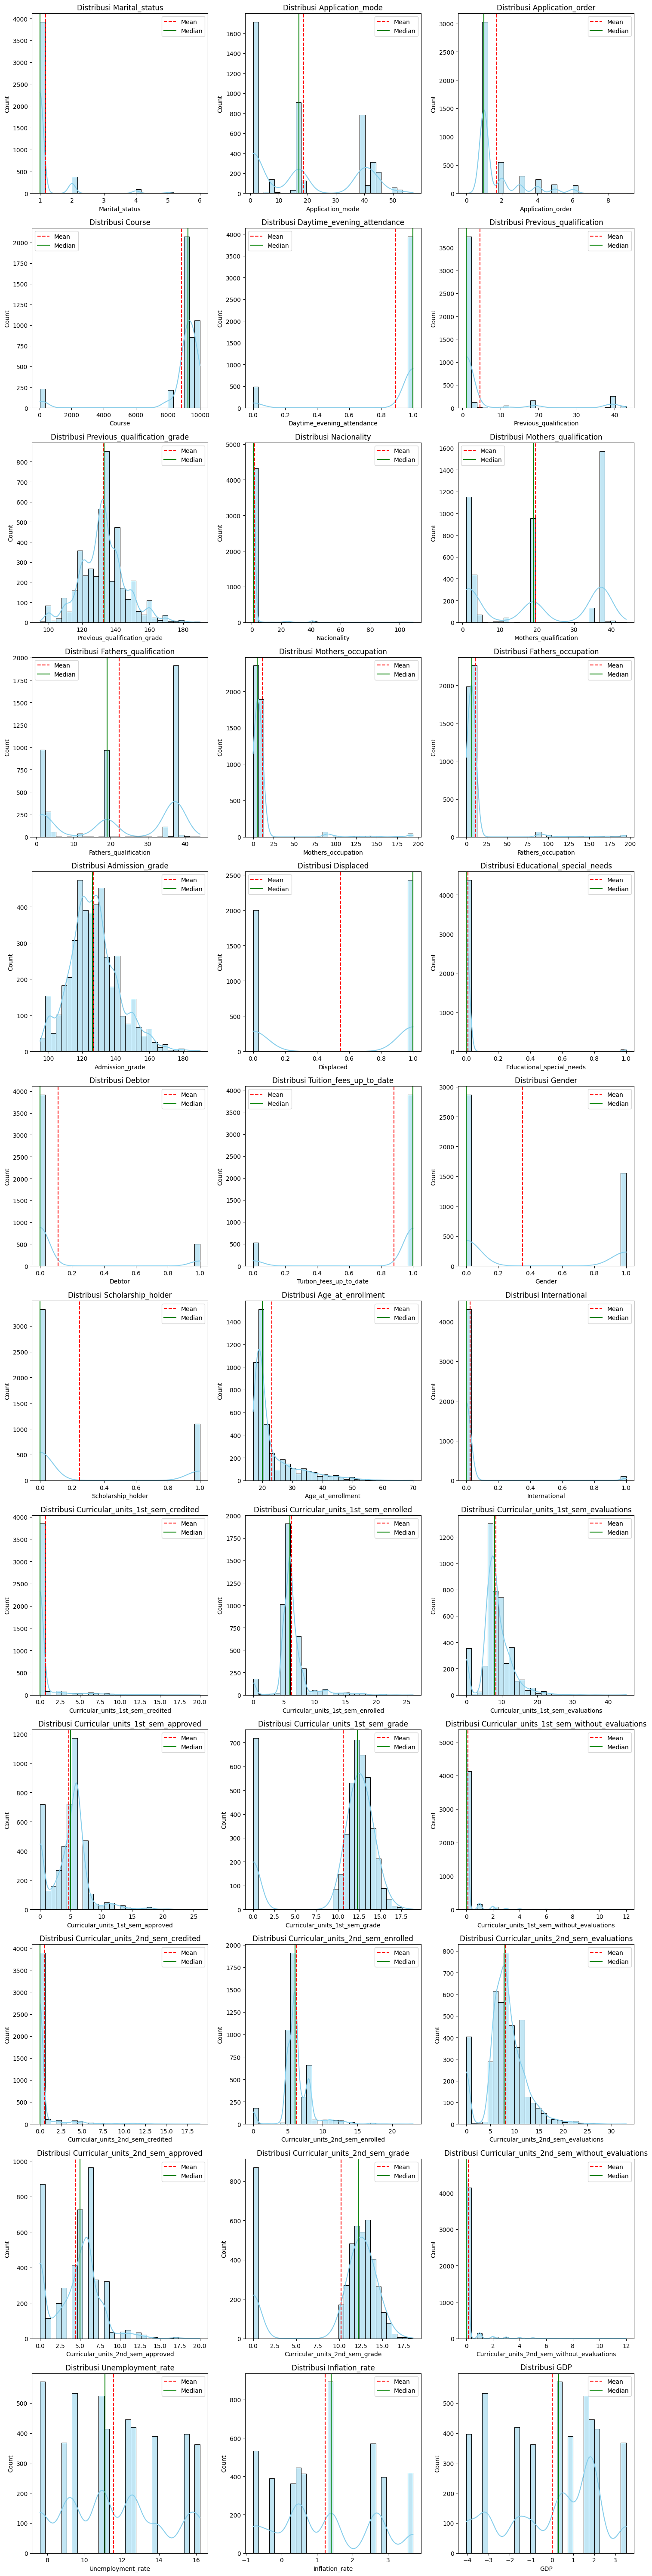

In [10]:
# Mencari Distribusi Data
def plot_distributions(data):
    # Pilih hanya kolom numerik
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # Calculate number of rows needed (rounded up)

    # Setup plot
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))
    axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

    for i, col in enumerate(numeric_cols):
        ax = axes[i] # Get the current axis

        # Histogram + KDE
        sns.histplot(data[col], kde=True, bins=30, color='skyblue', ax=ax)
        ax.set_title(f'Distribusi {col}')
        ax.axvline(data[col].mean(), color='r', linestyle='--', label='Mean')
        ax.axvline(data[col].median(), color='g', linestyle='-', label='Median')
        ax.legend()

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig('distribusi_data.png')
    plt.show()

plot_distributions(data)

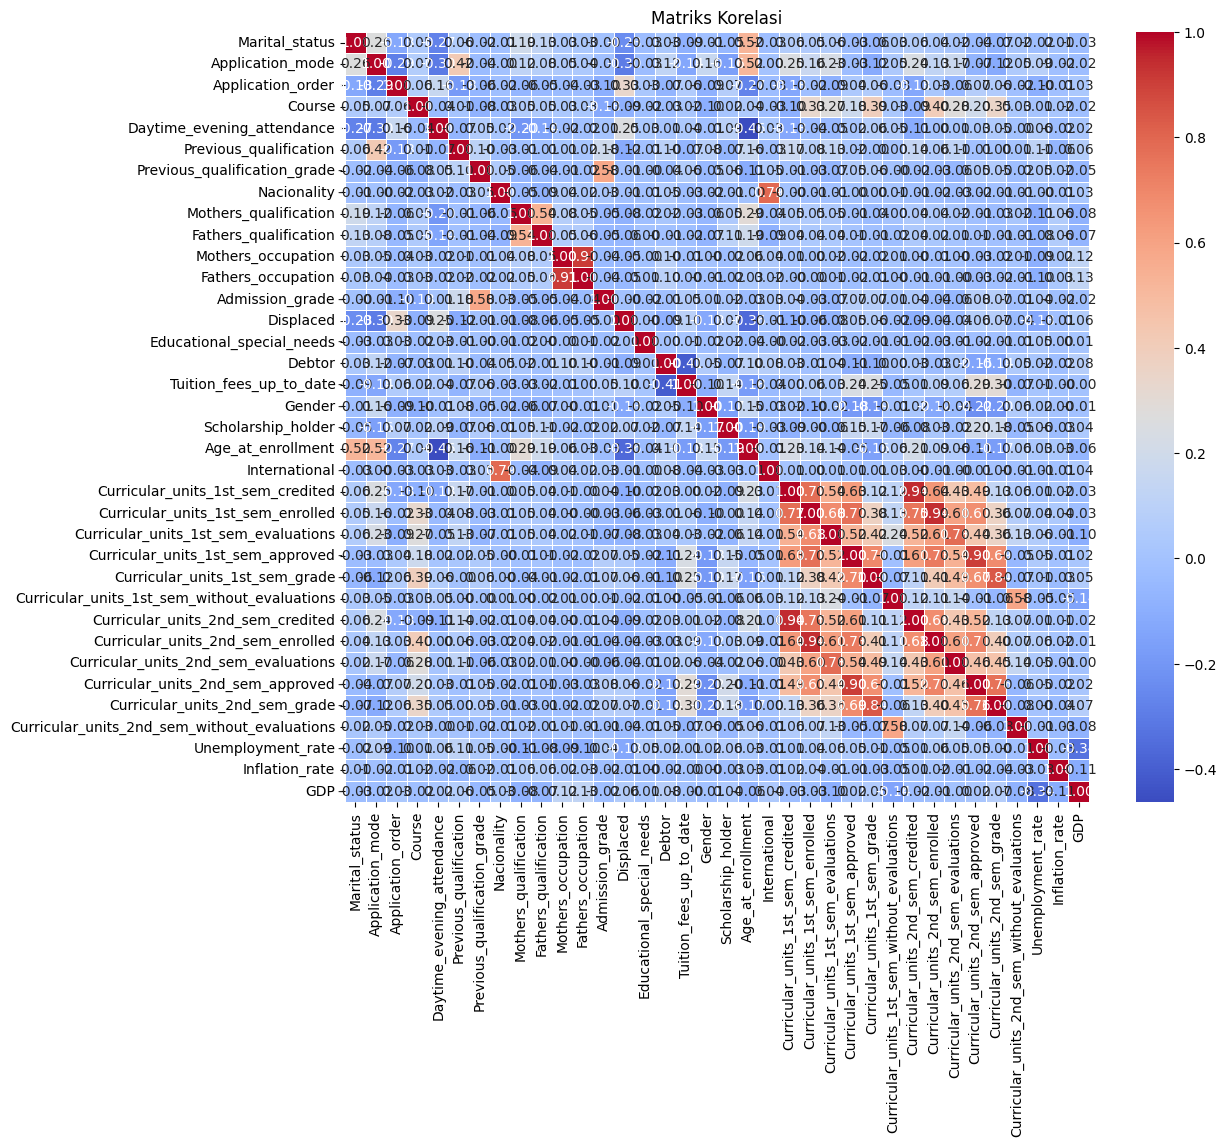

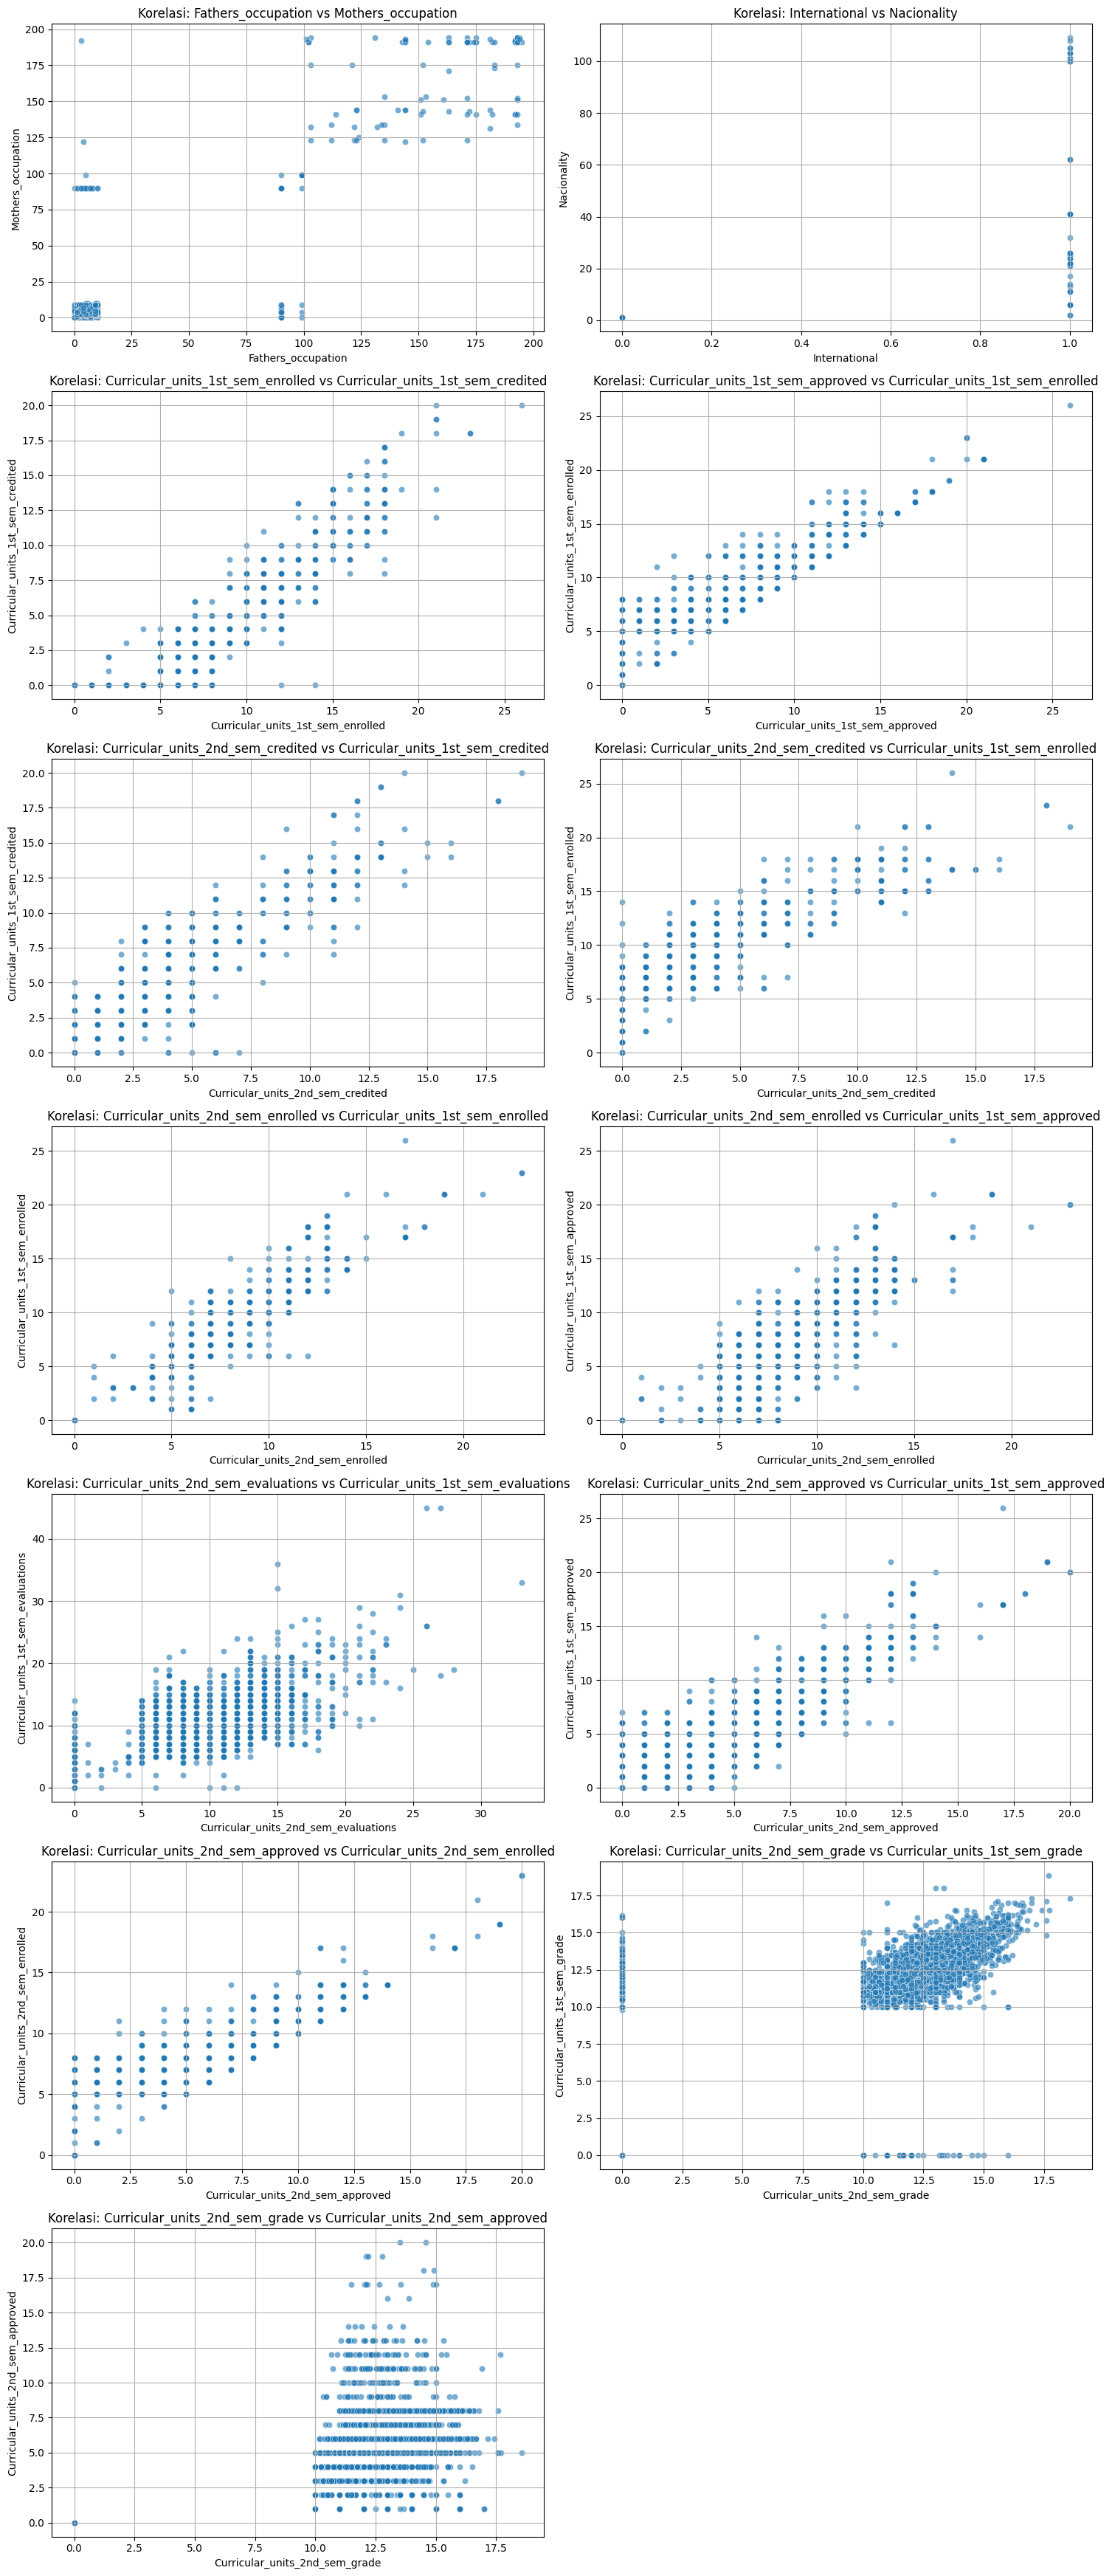

In [11]:
# Mencari Korelasi Data
def plot_correlations(data):
    # Hitung korelasi
    corr_matrix = data.select_dtypes(include=[np.number]).corr()

    # Heatmap Korelasi
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=".5")
    plt.title('Matriks Korelasi')
    plt.savefig('korelasi_heatmap.png')
    plt.show()

    # Scatter plot untuk korelasi kuat
    strong_corr = (corr_matrix.abs() > 0.7) & (corr_matrix.abs() < 1.0)
    pairs = []
    for i in range(len(strong_corr.columns)):
        for j in range(i):
            if strong_corr.iloc[i, j]:
                pairs.append((strong_corr.columns[i], strong_corr.columns[j]))

    if pairs:
        n_pairs = len(pairs)
        n_cols = 2  # Number of columns in the subplot grid
        n_rows = (n_pairs + n_cols - 1) // n_cols  # Calculate number of rows needed

        plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows
        for i, (col1, col2) in enumerate(pairs, 1):
            plt.subplot(n_rows, n_cols, i)
            sns.scatterplot(data=data, x=col1, y=col2, alpha=0.6)
            plt.title(f'Korelasi: {col1} vs {col2}')
            plt.grid(True)

        plt.tight_layout()
        plt.savefig('korelasi_scatter.png')
        plt.show()
    else:
        print("Tidak ditemukan korelasi kuat (>0.7) antar variabel")

plot_correlations(data)

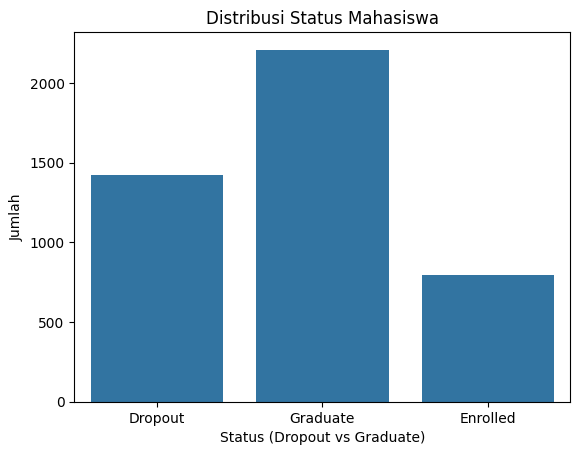

Status
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64


In [12]:
# Tampilkan distribusi target dopout
sns.countplot(data=data, x='Status')
plt.title('Distribusi Status Mahasiswa')
plt.xlabel('Status (Dropout vs Graduate)')
plt.ylabel('Jumlah')
plt.show()

# Tampilkan proporsi kelas
print(data['Status'].value_counts(normalize=True))

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
# 2. Menghapus Data Duplikat
df_cleaned = data.drop_duplicates()

print("Duplikat dihapus. Dataset baru memiliki", len(df_cleaned), "baris.")

Duplikat dihapus. Dataset baru memiliki 4424 baris.


In [16]:
# 3. Normalisasi atau Standarisasi Fitur
# Cek Tipe Data (Numerikal & Kategorikal)
data.dtypes.value_counts()

# Pisahkan kolom numerik dan kategorik
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Memisahkan Fitur dan Target
# Target kolom
y = data['Status']

# Fitur: semua kolom kecuali target
X = data.drop(columns=['Status'])

feature_names = X.columns.tolist()
print("Daftar nama fitur:")
print(feature_names)

print("Fitur (X):", X.shape)
print("Target (y):", y.shape)
print("Contoh target label:", y.unique())

Daftar nama fitur:
['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']
Fitur (X): (4424, 36)
Target (y): 

In [18]:
# 4. Deteksi dan Penanganan Outlier
num_cols = data.select_dtypes(include='number').columns

# Deteksi outlier dengan IQR
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Kolom '{col}' memiliki {len(outliers)} outlier")

# Hapus semua outlier dari semua kolom numerik
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Simpan hasil bersih
#data.to_csv("data_cleaned_no_outliers.csv", index=False)

Kolom 'Marital_status' memiliki 505 outlier
Kolom 'Application_mode' memiliki 0 outlier
Kolom 'Application_order' memiliki 541 outlier
Kolom 'Course' memiliki 442 outlier
Kolom 'Daytime_evening_attendance' memiliki 483 outlier
Kolom 'Previous_qualification' memiliki 707 outlier
Kolom 'Previous_qualification_grade' memiliki 179 outlier
Kolom 'Nacionality' memiliki 110 outlier
Kolom 'Mothers_qualification' memiliki 0 outlier
Kolom 'Fathers_qualification' memiliki 0 outlier
Kolom 'Mothers_occupation' memiliki 182 outlier
Kolom 'Fathers_occupation' memiliki 177 outlier
Kolom 'Admission_grade' memiliki 86 outlier
Kolom 'Displaced' memiliki 0 outlier
Kolom 'Educational_special_needs' memiliki 51 outlier
Kolom 'Debtor' memiliki 503 outlier
Kolom 'Tuition_fees_up_to_date' memiliki 528 outlier
Kolom 'Gender' memiliki 0 outlier
Kolom 'Scholarship_holder' memiliki 1099 outlier
Kolom 'Age_at_enrollment' memiliki 441 outlier
Kolom 'International' memiliki 110 outlier
Kolom 'Curricular_units_1st_sem

In [19]:
# 5. Encoding Data Kategorikal
def encode_categorical(df, encoding_type='onehot', drop_first=True):
    """
    Meng-encode kolom kategorikal pada DataFrame.

    Parameter:
    ----------
    df : pandas.DataFrame
        Data input.
    encoding_type : str, default='onehot'
        Tipe encoding: 'onehot' atau 'label'.
    drop_first : bool, default=True
        Jika onehot, drop kolom pertama (hindari multikolinearitas).

    Return:
    -------
    df_encoded : pandas.DataFrame
        DataFrame hasil encoding.
    """

    df_copy = df.copy()
    cat_cols = df_copy.select_dtypes(include=['object', 'category']).columns.tolist()

    if encoding_type == 'onehot':
        df_encoded = pd.get_dummies(df_copy, columns=cat_cols, drop_first=drop_first)
        return df_encoded

    elif encoding_type == 'label':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        for col in cat_cols:
            df_copy[col] = le.fit_transform(df_copy[col])
        return df_copy

    else:
        raise ValueError("encoding_type harus 'onehot' atau 'label'")


In [20]:
# 6. Binning (Pengelompokan Data)

# Example binning_info dictionary.
# Replace with your desired binning configurations.
binning_info = {
    # 'Nama_Kolom': {'method': 'cut', 'bins': [0, 10, 20, 30, np.inf], 'labels': ['0-10', '11-20', '21-30', '>30']}
    # Add other columns to bin as needed
}

if binning_info:
        for col, bin_conf in binning_info.items():
            method = bin_conf.get('method', 'cut')
            bins = bin_conf['bins']
            labels = bin_conf.get('labels', None)

            if method == 'cut':
                df[f'{col}_bin'] = pd.cut(df[col], bins=bins, labels=labels)
            elif method == 'qcut':
                df[f'{col}_bin'] = pd.qcut(df[col], q=bins, labels=labels)
            else:
                raise ValueError("Metode binning harus 'cut' atau 'qcut'.")

In [21]:
# Deteksi fitur kategorikal
cat_cols = X.select_dtypes(include='object').columns
print(cat_cols)

# Cek apakah encoding sukses
print("Contoh hasil encoding fitur kategorikal:")
print(X[cat_cols].head())


Index([], dtype='object')
Contoh hasil encoding fitur kategorikal:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [22]:
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tampilkan bentuk array hasil scaling
print("X_scaled shape:", X_scaled.shape)

# Contoh nilai setelah scaling
pd.DataFrame(X_scaled, columns=X.columns).head()


X_scaled shape: (4424, 36)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# Cek distribusi label di training dan testing
print("Distribusi label di training set:\n", y_train.value_counts(normalize=True))
print("Distribusi label di testing set:\n", y_test.value_counts(normalize=True))

Train shape: (3539, 36) (3539,)
Test shape: (885, 36) (885,)
Distribusi label di training set:
 Status
Graduate    0.499294
Dropout     0.321277
Enrolled    0.179429
Name: proportion, dtype: float64
Distribusi label di testing set:
 Status
Graduate    0.499435
Dropout     0.320904
Enrolled    0.179661
Name: proportion, dtype: float64


In [25]:
# Inisialisasi scaler
scaler = StandardScaler()

# Fitting hanya pada data training
scaler.fit(X_train)

# Simpan scaler ke file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Modeling

In [26]:
# Define n_estimators
n_estimators = 100

# Membuat Model dengan Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=n_estimators,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluation

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       284
    Enrolled       0.57      0.38      0.45       159
    Graduate       0.79      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



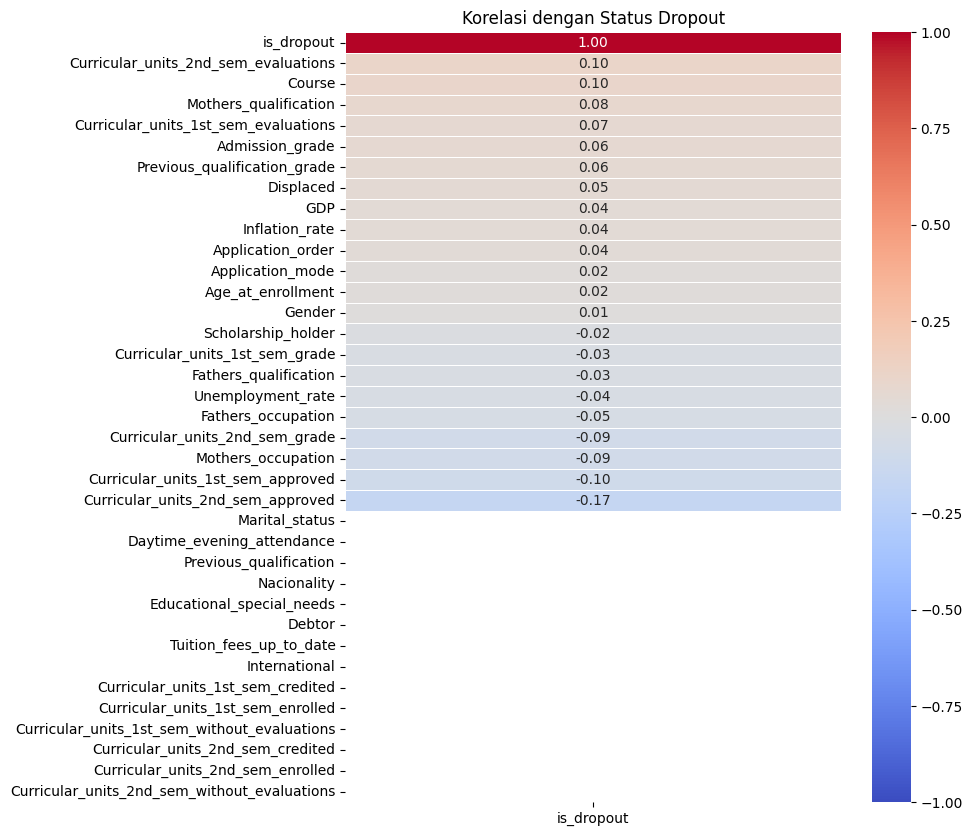

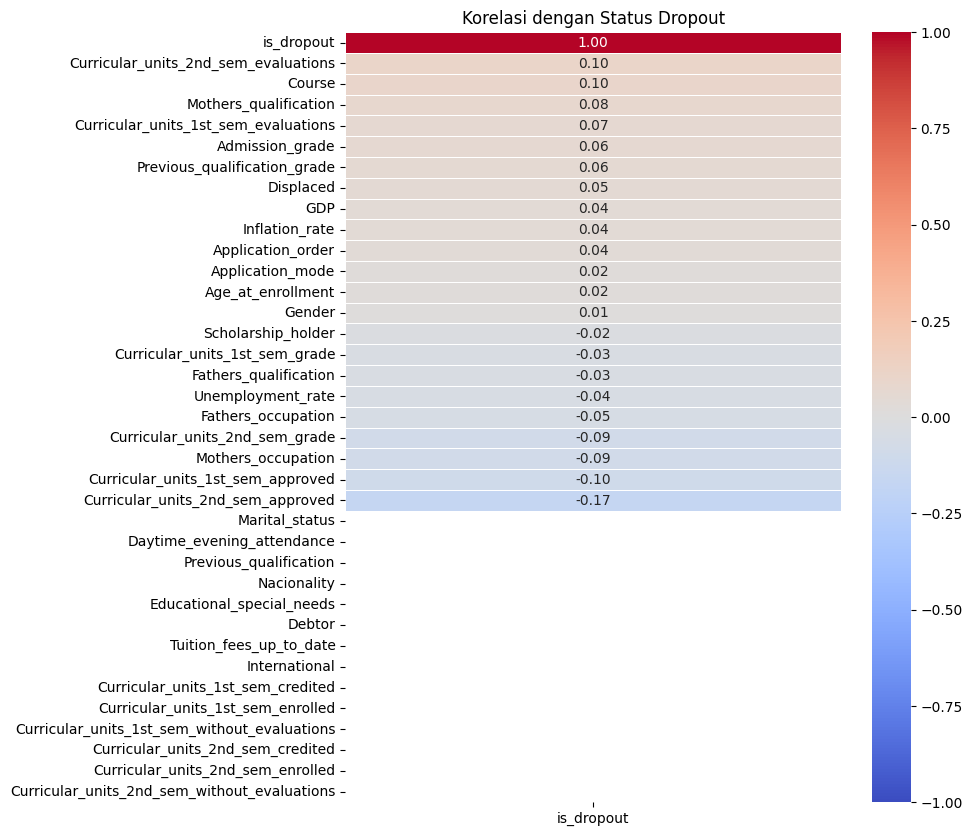

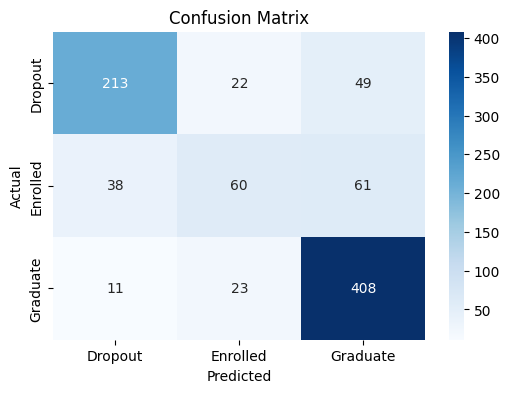

In [32]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
# Analisis Multivariate
# Add 'is_dropout' column for analysis
if 'Status' in data.columns:
    data['is_dropout'] = data['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Hitung korelasi semua fitur dengan status dropout
corr_matrix = data.corr(numeric_only=True)[['is_dropout']].sort_values('is_dropout', ascending=False)

fig, ax = plt.subplots(figsize=(8, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax,
           fmt=".2f", linewidths=0.5)
plt.title("Korelasi dengan Status Dropout")
st.pyplot(fig)

2025-07-16 02:53:14.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 02:53:15.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 02:53:15.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 02:53:15.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [33]:
# Simpan model ke file
joblib.dump(model, 'model_rf.pkl')

['model_rf.pkl']